In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import band_count

In [2]:
data_dir = "./data/"
# provided that the .txt file exists!
data_grey_fn = data_dir + "cleaned_grey_values.txt"
grey_values = pd.read_csv(data_grey_fn)
print(grey_values)

      Distance_(pixels)  Gray_Value  new_pixel  case  cleaned_grey sex
0                   432    126.7965          0    43      4.842583   M
1                   433    126.2878          1    43      4.838563   M
2                   434    123.3846          2    43      4.815306   M
3                   435    120.0393          3    43      4.787819   M
4                   436    118.5882          4    43      4.775657   M
...                 ...         ...        ...   ...           ...  ..
5678               1746    104.8251       1480    56      4.631919   F
5679               1747    104.6929       1481    56      4.631425   F
5680               1748    103.3024       1482    56      4.637661   F
5681               1749    101.6086       1483    56      4.621128   F
5682               1750    101.0000       1484    56      4.615121   F

[5683 rows x 6 columns]


In [3]:
# seperate sharks
shark_ids = [43,44,55,56]
grey_array = [
    grey_values[grey_values['case']==i]["Gray_Value"] for i in shark_ids
]

In [4]:
# shark parameters
# max_age is used to help filter out very low frequency content
# it is the maximum possible age of a shark
# err on the side of over estimating this number
max_age = 40
# is the death rate per year of sharks (a number between 0 and 1)
# if this is set to a number then the a geometric prior distribution on the 
# number of peaks is used to penalise the smoothing (in addition to BIC)
# If set to None, then no prior penalty is applied
mortality_rate = None

# When the series long, the dictionary of wavelets gets very large
# The max_corr parameter sets the maximum possible correlation 
# (disregarding edge effect) between the vectors in the dictionary
# A large max_corr gives the smoother more flexibility, but increases computation. 
# A smaller value reduces computation but decreases model flexibility.
# Keep this number as large as practical. Alternatively, the data can be subsampled
# to reduce computation.
max_corr = 0.95

# The number of bootstrap simulations to do to estimate the distribution 
# of the smooth. Keep this as large as practical.
n_sim = 32

building dictionary...
...done.
(1181, 116287)


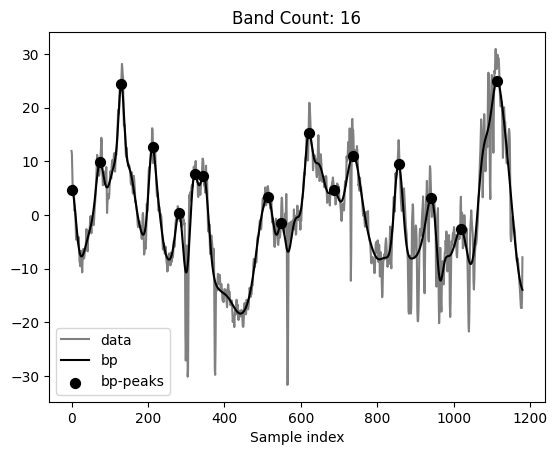

In [ ]:
for i in range(len(grey_array)):
    counter = band_count.BandCounter(grey_array[i], 
                                     max_bands=max_age, 
                                     mortality_rate=mortality_rate,
                                     max_corr=max_corr,
                                     wavelets=(band_count.denoising.ricker,))
    print(counter.denoiser.get_X().shape)
    
    p = counter.plot(filter=True)
    plt.legend(["data", "bp", "bp-peaks"])
    plt.show()
    
    locs, counts, smootheds = counter.get_count_distribution(n_sim, seed=12321)
    plt.plot(smootheds.T, color="grey", alpha=10/100)
    plt.plot(counter.low_freq_smoothed.smoothed, color="black")
    plt.xlabel("Sample index")
    plt.title("Posterior simulations of smoothed regression line: BPDN")
    plt.show()

    plt.figure()
    plt.hist(counts, bins=np.linspace(min(counts)-0.5, max(counts)+0.5, num=max(counts)-min(counts)+2), alpha=0.2, label='BPDN', color='blue')
    plt.xlabel("Num peaks")
    plt.ylabel("Count")
    plt.title("Posterior distribution of number of peaks")
    plt.show()